# MCS 275 Spring 2024 Worksheet 10 Solutions

* Course instructor: David Dumas
* Contributors to this document: Karoline Dubin, Johnny Joyce, Kylash Viswanathan

## Topics

This worksheet focuses on **Matplotlib** as covered in Lectures 24--26.  It also makes use of the material on **Julia sets** from lecture 23.


## Resources

These things might be helpful while working on the problems.  Remember that for worksheets,  we don't strictly limit what resources you can consult, so these are only suggestions.

* [Lecture 23 - Julia sets](http://dumas.io/teaching/2024/spring/mcs275/slides/lecture23.html)
* [Lecture 24 - matploblib 1](http://dumas.io/teaching/2024/spring/mcs275/slides/lecture24.html)
* [Lecture 25 - matplotlib 2](http://dumas.io/teaching/2024/spring/mcs275/slides/lecture25.html)
* [Lecture 26 - databases (and a little matplotlib)](http://dumas.io/teaching/2024/spring/mcs275/slides/lecture26.html)
* [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/):
    * Chapter 2 covers numpy
    * Chapter 4 covers matplotlib
* [Course sample code repo](https://github.com/daviddumas/mcs275spring2024/blob/main/samplecode/)
    * Especially [/numpy_matplotlib/](https://github.com/daviddumas/mcs275spring2024/blob/main/samplecode/numpy_matplotlib/)

* [Downey's book, *Think Python*](https://greenteapress.com/thinkpython2/html/)
* MCS 260 course materials from Fall 2021:
    * [Slides, homework, worksheets, and projects](https://www.dumas.io/teaching/2021/fall/mcs260/)
    * [MCS 260 Sample programs](https://github.com/daviddumas/mcs260fall2021/tree/main/samplecode)

## To think about

There's a [section of this document with some advice about how to work on it](#General-Suggestions).  I suggest checking that out, but for the sake of getting straight to the problems it's at the end instead of the beginning.


## 1.  A few functions

Matplotlib is not a perfect tool for making graphs of functions (because it doesn't know about continuity, domain, etc.; it just plots data point).  But it can be used for this.  To get started working on your own with matplotlib, make plots of the following functions according to the given specifications:

A single figure shows a range of 1 to 20 on the x axis and 0 to 600 on the y axis.  The graphs of four functions are shown:
* $f(x) = 100 \log(x)$ is shown in a thin, dotted black line
* $f(x) = 15x$ is shown in dark blue
* $f(x) = 10x \log(x)$ is shown in orange
* $f(x) = x^2$ is shown in red, with a thicker line

(In these expressions, $\log(x)$ means the natural logarithm, which is the usual mathematical convention and is consistent with the name in numpy.  The same function is sometimes called $\ln(x)$.)

The x axis should be labeled "x", and the y axis should be labeled "Instructions executed".

The plot should have a legend showing which function corresponds to each color and line style.

You should use 50 sample points when computing the arrays for these plots, and for the plot of $f(x) = 15x$, the individual data points should be marked with dots (in addition to the line running through them).

The plot should have an overall title "Several functions".

## Solution

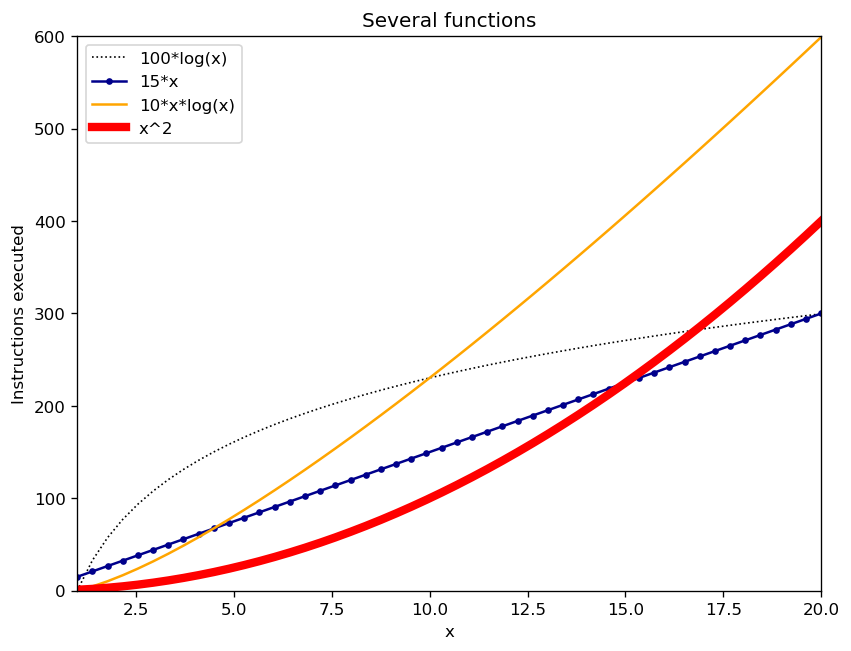

In [3]:
# Based on solution prepared for MCS 275 Spring 2023

plt.figure(figsize=(8,6),dpi=120)

# 50 sample points
x = np.linspace(1, 20, 50)

# Plot each function
plt.plot(x, 100*np.log(x), color="black", linewidth=1, linestyle=":", label="100*log(x)") # thin, dotted black line
plt.plot(x, 15*x, color="darkblue", marker=".", label="15*x") # dark blue, solid line AND dots
plt.plot(x, 10*x*np.log(x), color="orange", label="10*x*log(x)") # orange, solid line
plt.plot(x, x**2, color="red", linewidth=5, label="x^2") # red, thicker line

# Labels, title, legend
plt.xlabel("x")
plt.ylabel("Instructions executed")
plt.title("Several functions")
plt.legend()

# Limits of axes
plt.xlim(1,20)
plt.ylim(0,600)

plt.show()

However, when plotting many functions on a single plot, it may be helpful to use `plt.subplots` (as shown in the first line in the cell below). This gives us two variables we can use:

* `fig`: This allows us to change attributes of the figure itself (we won't use this in this example)
* `ax`: This returns the set of axes to which we want to add our function plots. This means we can refer to the same set of axes each time, allowing us to be sure that our functions are all placed on the same axes. In other situations, `ax` may contain an array containing many sets of axes (if we had a single image with multiple sub-plots within it)

This approach also slightly changes some syntax. E.g. `plt.plot` becomes `ax.plot`; `plt.xlabel` becomes `ax.set_xlabel`, etc. The exact differences between the two approaches can be seen here: https://www.diffchecker.com/bQ6Oe3Zw/

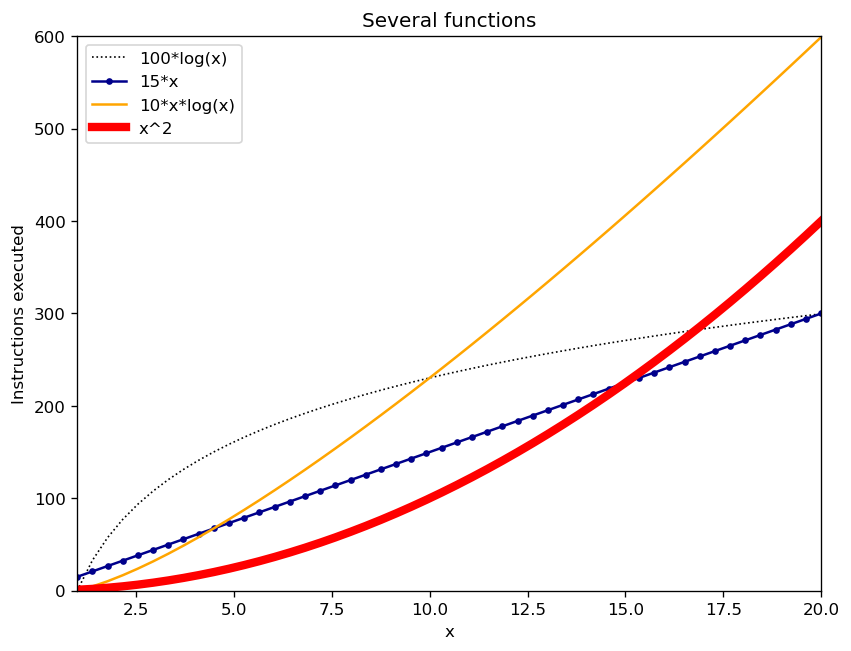

In [4]:
fig, ax = plt.subplots(figsize=(8,6),dpi=120)

# 50 sample points
x = np.linspace(1, 20, 50)

# Plot each function
ax.plot(x, 100*np.log(x), color="black", linewidth=1, linestyle=":", label="100*log(x)") # thin, dotted black line
ax.plot(x, 15*x, color="darkblue", marker=".", label="15*x") # dark blue, solid line AND dots
ax.plot(x, 10*x*np.log(x), color="orange", label="10*x*log(x)") # orange, solid line
ax.plot(x, x**2, color="red", linewidth=5, label="x^2") # red, thicker line

# Labels, title, legend
ax.set_xlabel("x")
ax.set_ylabel("Instructions executed")
ax.set_title("Several functions")
ax.legend()

# Limits of axes
ax.set_xlim(1, 20)
ax.set_ylim(0, 600)

plt.show()

### Side note:

As a quick example of why we might want to use `subplots`: Let's say that we were asked to make a single image with each function plotted on a single pair of axes. Then we can use `plt.subplots(2, 2, ...)`, which returns a 2$\times$2 grid of axes. We can then use 2D array indexing to refer to each pair of axes separately.

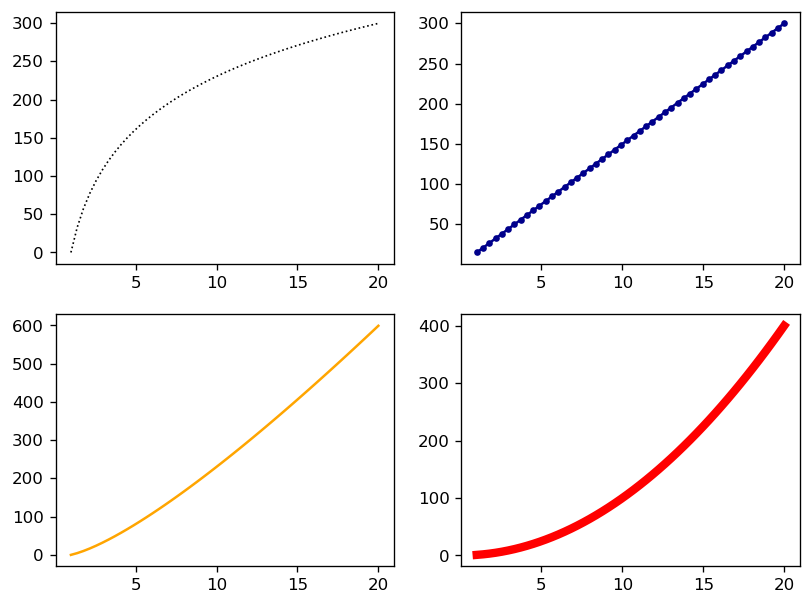

In [5]:
fig, ax = plt.subplots(2,2,figsize=(8,6),dpi=120)

# 50 sample points
x = np.linspace(1, 20, 50)

# Plot each function
# `ax` is a 2D array, so we can use two indices to refer to each set of axes individually
ax[0,0].plot(x, 100*np.log(x), color="black", linewidth=1, linestyle=":", label="100*log(x)") # thin, dotted black line
ax[0,1].plot(x, 15*x, color="darkblue", marker=".", label="15*x") # dark blue, solid line AND dots
ax[1,0].plot(x, 10*x*np.log(x), color="orange", label="10*x*log(x)") # orange, solid line
ax[1,1].plot(x, x**2, color="red", linewidth=5, label="x^2") # red, thicker line

plt.show()

## 2. Nuclides scatter plot

Every atom has a nucleus that contains protons and neutrons.  The number of protons determines what chemical element the atom corresponds to, e.g. a hydrogen nucleus has one proton, a helium nucleus has two, and a carbon nucleus has 6.  My favorite element, tin, has nuclei with 50 protons.

The number of neutrons can vary from one atom of an element to another.  Most carbon atoms have 6 neutrons, but some have 7 or 8.  These are called *isotopes* of carbon.  The 6- and 7-neutron carbon atoms are stable (they don't break apart on their own), while the 8-neutron ones are unstable: in time, such atoms undergo radioactive decay and turn into another element.

The term *nuclides* refers to all isotopes of all elements.  That is, it refers to all the possible nuclei that exist.  While you're probably familiar with the periodic table containing about 115 elements, there are thousands of nuclides.

Using data from the [International Atomic Energy Agency API](https://www-nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html), I've constructed a CSV file containing data about 2935 nuclides.  I selected the ones that are either stable or have a limited degree of instability (each nucleus typically surviving for at least 1 millisecond).  Here's a link to the file:

* [nuclides.csv](https://www.dumas.io/teaching/2024/spring/mcs275/data/nuclides.csv)

There are five columns in this file:
* `symbol` : The two-letter symbol for the corresponding chemical element (str)
* `neutrons` : The number of neutrons (int)
* `protons` : The number of protons (int)
* `instability` : A number between 0.0 and 1.0 which measures how unstable the nuclide is. (See [below](#Footnote:-What-instability-measurement-is) if you want a more detailed explanation.) A value of 0.0 means stable or very slow decay; 1.0 means fast decay.  (float)
* `abundance` : Among all nuclides with this number of protons, what percentage have this number of neutrons.  Between 0.0 and 100.0.  (float)

Make a scatter plot in which
* Each nuclide is marked by a dot
* The number of neutrons is the x coordinate of the dot
* The number of protons is the y coordinate of the dor
* The dots are small enough to not overlap, but big enough to be seen
* The color of the dot indicates the degree of instability
* The dots come in two sizes:
   * Small dots for nuclides with an abundance less than 5%
   * Big dots (three times as large) for abundance of 5% or greater
* There is a title "Nuclides with half-life at least 1ms"
* The x- and y-axes are labeled
* There is a colorbar

When you're done, you'll have created something similar to the live web-based visualization system on the [IAEA Live Chart of Nuclides](https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html).  If you want, you can use that site as a reference for certain aspects of what your plot will look like.  (That site colors points by type of decay by default, but can be configured to color by stability using the menus.)

### Loading CSV files by columns

You might recall in lecture 25 I wrote some code to load a CSV file into a dictionary mapping column names to arrays of values, and that was helpful for making scatter plots.  You'll want something similar for this problem, so here is a polished version of that code you can use.  You just call `csv_columns(fn)` with `fn` replaced by a filename to get such a dictionary as the return value.

The popular Python module `pandas` provides similar functionality and much more, but as we haven't talked about it yet, we adopt this simple and direct approach.

In [6]:
# Based on solution prepared for MCS 275 Spring 2023


import numpy as np
import csv
import collections

def best_guess_type_conv(L):
    """
    Make a guess about the type of values represented
    by the list of strings L.  Convert to integers if
    possible, floats if not, and keep as strings if
    both of those fail.
    """
    try:
        V = [float(x) for x in L]
    except ValueError:
        return L[:]  # not floats -> keep as str
    
    W = [int(x) for x in V]
    if V==W:
        # Converting to int did not change any
        # values; so they seem to be integers.
        return W
    
    return V

def csv_columns(fn):
    """
    Read a CSV file with headers and return
    a dictionary whose keys are column names
    and whose values are numpy arrays  
    """
    columns_raw = collections.defaultdict(list)

    with open(fn,"r",newline="",encoding="UTF-8") as fp:
        reader = csv.DictReader(fp)
        for row in reader:
            for field in row:
                x = row[field]
                columns_raw[field].append(x)
    columns = dict()
    for colname, coldata in columns_raw.items():
        V = best_guess_type_conv( coldata )
        if isinstance(V[0],str):
            columns[colname] = V
        else:
            columns[colname] = np.array(V)
    return columns

## Solution

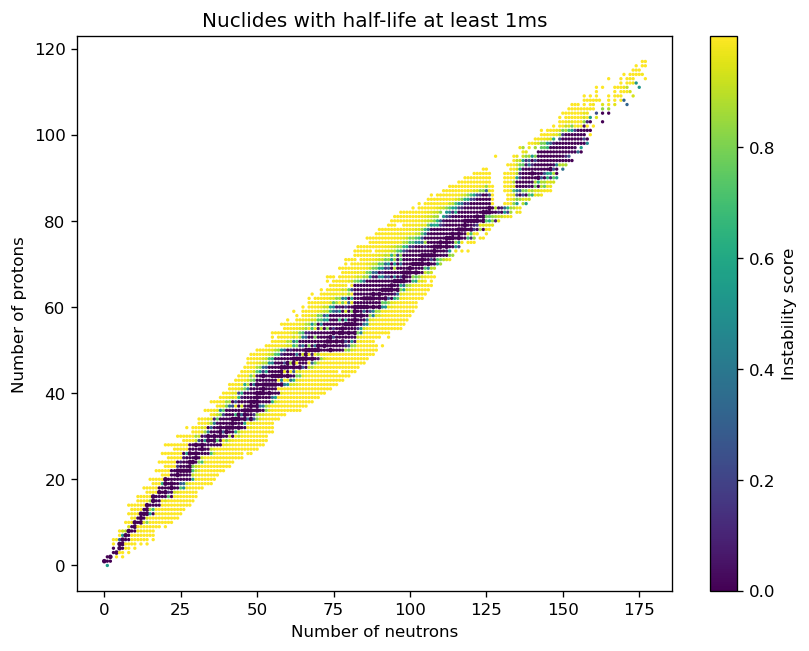

In [7]:
data = csv_columns("nuclides.csv")

plt.figure(figsize=(8,6),dpi=120)

# An array with value 3 for each nuclide with abundance greater than 5%
# ... and with value 1 for each nuclide with abundance <= 5%
sizes = 2*(data["abundance"] > 5).astype("uint8") + 1

# Alternative way to define `sizes`: 
# sizes = np.where(data["abundance"] > 5, 3, 1)

plt.scatter(data["neutrons"], data["protons"], 
            s=sizes, # Sizes corresponding to the array we made earlier
            c=data["instability"], # Color-coded by instability
           )

plt.title("Nuclides with half-life at least 1ms")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of protons")
plt.colorbar(label="Instability score")

plt.show()

### Footnote: What instability measurement is

You don't need to read this section.  It contains more detail about what the instability measurements in `nuclides.csv` really mean.

The column `instability` contains a number $x$ that is computed from the half-life $\lambda$ of the nuclide (measured in seconds) as follows:

$$
x = e^{-\frac{\lambda}{1000}}
$$

For example, if the nuclide is stable, then $\lambda = +\infty$ and $x=0$.  But if it is very unstable, $\lambda$ will be near $0$ and so $x$ will be close to $1$.

Recording $x$ in the data file rather than $\lambda$ makes it a little easier to construct a scatter plot.

## 3. Julia with matplotlib

In Lecture 23 we worked on a [notebook for making pictures of Julia sets](https://github.com/daviddumas/mcs275spring2024/blob/main/samplecode/numpy_matplotlib/julia.ipynb).  We ended up with nice pictures like this one:

![](images/ws10_nice_julia.png)

But they were created by passing `numpy` arrays directly to Pillow, so they don't come with axes or labels or any information about what part of the complex plane you're seeing.

Adapt the code from that notebook to generate an image of a Julia set and then display it in a matplotlib figure using `plt.imshow()`.  The desired output would look something like this:

![](images/ws10_nice_julia_imshow.png)

### Hint

You need to pass the `extent` keyword argument to `imshow` to tell it the limits of the x and y axes.  Check out [Section 4.04 of VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html) for details.

## Solution

In [8]:
import numpy as np

def k(z):
    return z*z

def q(z):
    return z*z - 0.1

def f(z):
    return z*z - 1

def g(z):
    return z*z - 0.52 + 0.53j

size = 300
radius = 1.5
xvals = np.linspace(-radius,radius,size) # row of all the real parts we need to use
yvals = np.linspace(-radius,radius,size) # row of all the imaginary parts we need to use

# Combine a row of real parts and a column of imaginary parts into a matrix of complex numbers
zz = xvals + 1j * yvals[::-1].reshape((size,1))

iterates = np.copy(zz)
active = np.ones_like(iterates,dtype="bool")  # Grid of True
for _ in range(1000):
    iterates[active] = g(iterates[active])  # Apply f to each pixel where we are supposed to proceed
    active[active] &= np.abs(iterates[active]) < 2  # In future iterations, only continue on the pixels where abs < 2
                                                     # (but only check this for points that remain active)

The next cell below contains the matplotlib code. Previously, we might have made a Pillow image using a line like this:

```
PIL.Image.fromarray(255*(1 - active.astype("uint8"))).save("images/ws11_nice_julia.png")
```

Instead, this cell uses the following line as an equivalent Matplotlib replacement:
```
plt.imshow(1 - active.astype("uint8"),
           extent = [np.min(xvals),np.max(xvals),np.min(yvals),np.max(yvals)],
           cmap="gray"
          )
```
Here, the keyword `extent` sets the limits for the `x` and `y` axes.

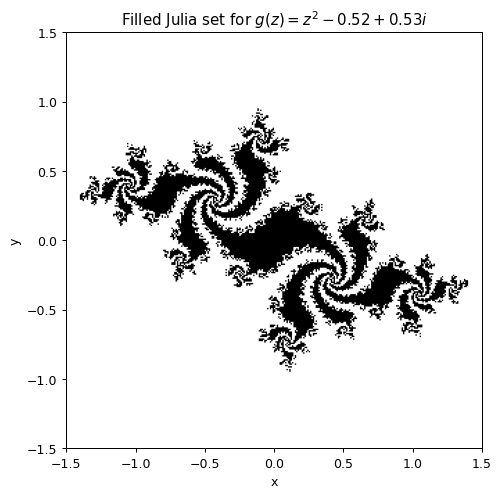

In [10]:
# Based on solution prepared for MCS 275 Spring 2023

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6),dpi=90)

plt.imshow(1 - active.astype("uint8"),
           extent = [np.min(xvals),np.max(xvals),np.min(yvals),np.max(yvals)],
           cmap="gray"
          )

plt.xlabel("x")
plt.ylabel("y")
plt.title("Filled Julia set for $g(z) = z^2- 0.52 + 0.53i$")
plt.savefig("images/ws11_nice_julia_imshow.png") # If this causes an error, be sure to create an `images` folder first

plt.show()